## Cholesky

> Solves $A=LLT$ with respect to $L$, where $L$ is a lower triangular matrix. $A$ must be Hermitian positive-definite.

Parameters  $A$ : Numpy array Hermitian, positive-definite input matrix.

Returns  $L$ : Numpy array Lower triangular matrix with $LLT=A$

In [1]:
import numpy as np

def cholesky(A, safety=True):
    """
    Solves $A = LL^T$ with respect to $L$, where $L$ is a lower triangular matrix.
    ´A´ must be Hermitian positive-definite.
    
    Parameters
    ----------
    A : (N,N) Numpy array
        Hermitian, positive-definite input matrix.

    Returns
    -------
    L : (N,N) Numpy array
        Lower triangular matrix with $LL^T = A$
        
        
        
    Implementation of algorithm 1.3.2 (Column Sweep Cholesky) from the book 'Numerical Methods in Matrix Computations' (2015) by Åke Björck on page 77
    """
    if safety:
        assert np.all(A == np.conjugate(A).T), 'Matrix is not hermitian'
    
    n = A.shape[0]    

    if np.any(np.iscomplex(A)):
        A = A.copy().astype(complex)
        L = np.zeros((n,n)).astype(complex)
    else:
        A = A.copy().astype(float)
        L = np.zeros((n,n)).astype(float)    
    
    for j in range(n):
        
        L[j, j] = np.sqrt(A[j,j] - np.dot(L[j,0:j], np.conj(L[j,0:j]) ))
        
        for i in range(j+1, n):
            
            L[i,j] = (A[i, j] - np.dot(L[i, 0:j], np.conj(L[j, 0:j]) )) / L[j,j]
                        
    return L
    

In [2]:
def backward_substitution(L,b):
    n = b.shape[0]
    z = np.zeros(n)
    L = L.copy().astype(float)
    b = b.copy().astype(float)
    
    for k in range(n-1,-1,-1):
        z[k] = (b[k]-z.dot(L[k,:]))/L[k,k]
        
    return z

In [3]:
def forward_substitution(L,b):
    n = b.shape[0]
    z = np.zeros(n)
    L = L.copy().astype(float)
    b = b.copy().astype(float)
        
    for k in range(0,n):
        z[k] = (b[k]-z.dot(L[k,:]))/L[k,k]
        
    return z


## Cholesky Solver

In [4]:
def cholesky_solver(A,b, safety=True):
    """
    Solves $Ax=b$ with respect to $x$ by decomposing $A$ into $LL^T$, where $L$ is a lower triangular matrix.
    $A$ must be Hermitian positive-definite.
    
    Parameters
    ----------
    A : (N,N) Numpy array
        Hermitian, positive-definite input matrix.
    b : (1,N) Numpy array

    Returns
    -------
    x : (1,N) Numpy array
        Solution to $Ax=b$ wrt. x
    """
    sols = []
    L = cholesky(A, safety)

    for bi in b:
        z = forward_substitution(L,bi)
        
        x = backward_substitution(L.T,z)
        
        sols.append(x)

        
    sols = sols[0] if len(sols) == 1 else sols
    
    return sols


## Gaussian Elimination solver

In [5]:
def gaussian_elimination(A,b): 
    
    n = b.shape[1]
    b = b.copy().astype(float)
    sols = []
    
    for bi in b:
        
        iter_A = A.copy().astype(float)

        for k in range(n-1):

            for j in range(k+1,n):

                assert iter_A[k,k]!=0, 'Div by zero'

                if (iter_A[j,k] != 0):
                    factor = iter_A[j,k]/iter_A[k,k]
                    iter_A[j,k+1:] = iter_A[j,k+1:] - factor*iter_A[k,k+1:] 
                    bi[j] = bi[j] - factor*bi[k]

        x = backward_substitution(iter_A,bi)

        sols.append(x)
        
    sols = sols[0] if len(sols) == 1 else sols
    
    return sols


## Time complexity testing

In [6]:
def measure_time(linear_solver, problem_size, runs=10, targets=1):
    t = 0
    problems = [gen_linear_problem(problem_size, targets=targets) for _ in range(runs)]
    _
    for i in range(runs):
        for j in range(targets):
            A, b = problems[i]
            s = time()
            linear_solver(A,b)
            e = time() - s
            t += e
        
    return t/(runs*targets)


In [7]:
def gen_linear_problem(problem_size, targets):
    n = problem_size
    A = np.random.random((n,n))
    A = A@A.T
    b = [np.random.random(n) for _ in range(targets)]
    return A, np.array(b)                                                


In [8]:
from time import time
runs = 3
targets = 1
start_size=0
step_width = 1
size = 200

In [9]:
times_cholesky = []
for i in range(start_size,size,step_width):
    times_cholesky.append(measure_time(cholesky_solver, i, runs=runs, targets=targets))


In [10]:
times_gauss = []
for i in range(start_size,size,step_width):
    times_gauss.append(measure_time(gaussian_elimination, i, runs=runs, targets=targets))

In [11]:
import matplotlib.pyplot as plt

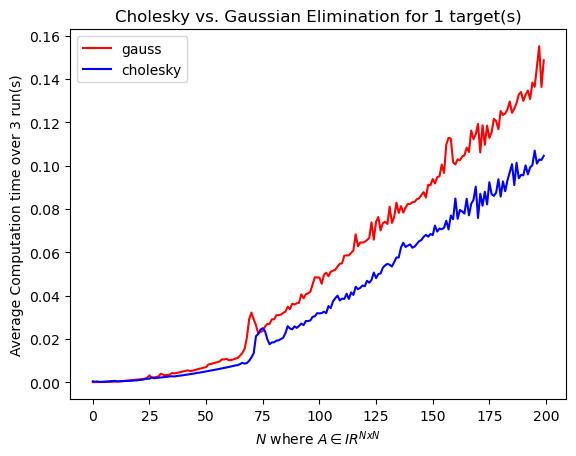

In [12]:
plt.plot((np.arange(start_size/step_width,size/step_width)*step_width).astype(int), times_gauss, label="gauss", c="red")
plt.plot((np.arange(start_size/step_width,size/step_width)*step_width).astype(int), times_cholesky, label="cholesky", c="blue")
plt.legend()
plt.xlabel("$N$ where $A \in IR^{N x N}$ ")
plt.ylabel(f"Average Computation time over {runs} run(s)")
plt.title(f"Cholesky vs. Gaussian Elimination for {targets} target(s)")
None